#### Import Required Packages

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import tensorflow as tf
from tensorflow.keras.models import load_model, save_model

import pickle


#### Loading the dataset

In [74]:
dataset = pd.read_csv('NFLX.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [75]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


#### Dataset Meta Data Information

In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB
None


#### Check for any nulls in the dataset

In [8]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no nulls in the dataset

#### Statisctical information 

In [9]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


#### EDA

In [10]:
cor = dataset.iloc[:,1:].corr()
cor

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


<Axes: >

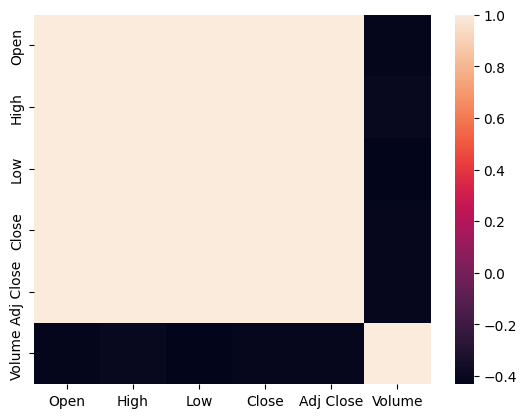

In [11]:
sns.heatmap(cor)

##### Relation b/w Open and Close variables

<Axes: xlabel='Open', ylabel='Close'>

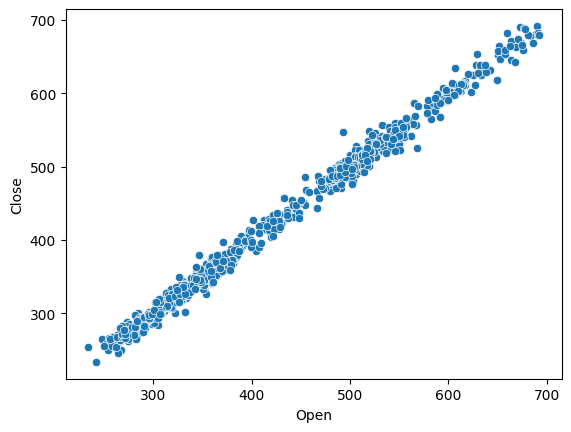

In [12]:
sns.scatterplot(data = dataset, 
                x= 'Open', 
                y = 'Close',
               )

We see that as value of Open increases, the close value also increases, showing positive correlation.

##### Relation b/w High and Close Variables

<Axes: xlabel='High', ylabel='Close'>

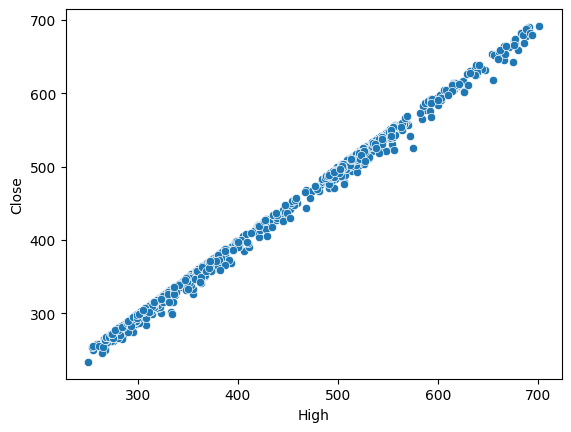

In [13]:
sns.scatterplot(data = dataset, 
                x= 'High', 
                y = 'Close',
               )

We see that as value of High increases, the close value also increases, showing positive correlation.

##### Relation b/w Low and Close Variables

<Axes: xlabel='Low', ylabel='Close'>

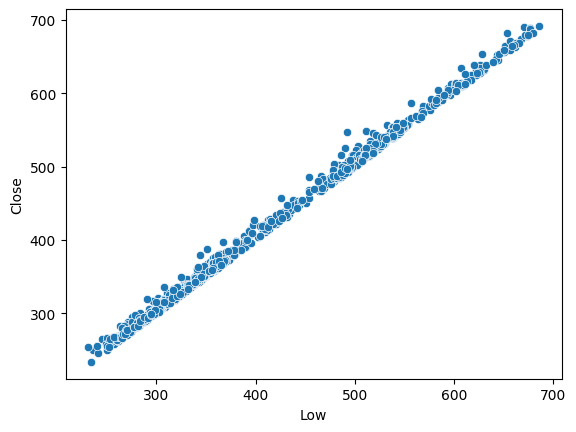

In [14]:
sns.scatterplot(data = dataset, 
                x= 'Low', 
                y = 'Close',
               )

We see that as value of Low increases, the close value also increases, showing positive correlation.

##### Relation b/w Volume and Close Variables

<Axes: xlabel='Volume', ylabel='Close'>

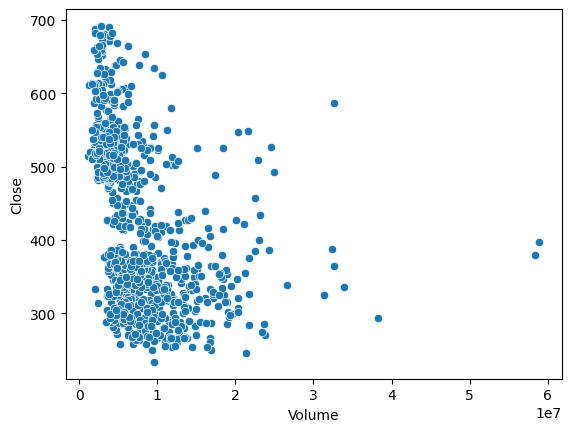

In [15]:
sns.scatterplot(data = dataset, 
                x= 'Volume', 
                y = 'Close',
               )

As we see, most of the observations have value of close to be high at lower values of Volume, and there are only few observations at high volume region, that have low close values. This kind of behavior implies slightly negative correlation

##### Boxplot

<Axes: >

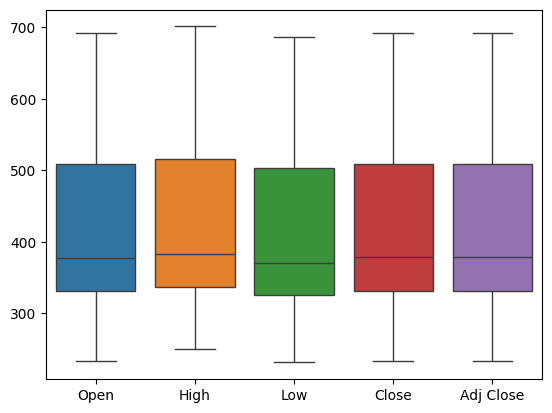

In [16]:
sns.boxplot(data = dataset.iloc[:,:-1])

And from above we see that all the variables are equally distributed, their means are close to each other.

##### Relation b/w Open and High Variables

<Axes: xlabel='Open', ylabel='High'>

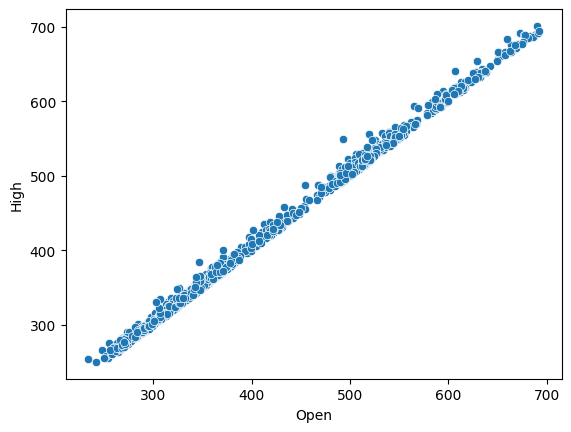

In [17]:
sns.scatterplot(data = dataset, 
                x= 'Open', 
                y = 'High',
               )

##### Relation b/w Open and Low Variables

<Axes: xlabel='Open', ylabel='Low'>

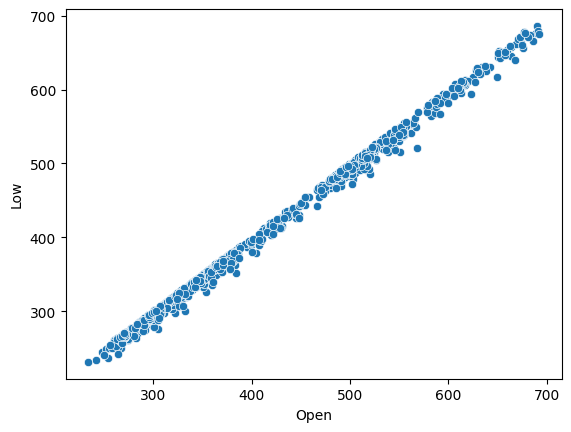

In [18]:
sns.scatterplot(data = dataset, 
                x= 'Open', 
                y = 'Low',
               )

##### Relation b/w High and Low Variables

<Axes: xlabel='High', ylabel='Low'>

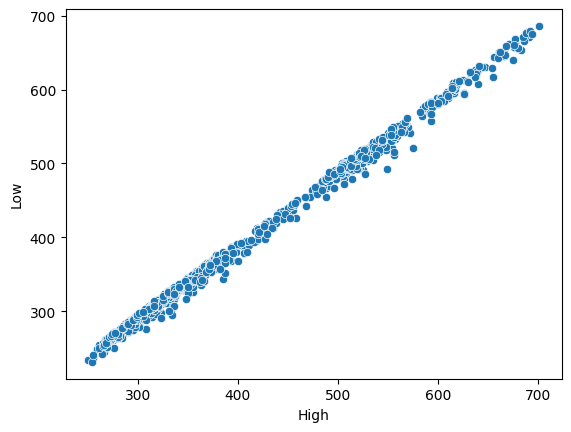

In [19]:
sns.scatterplot(data = dataset, 
                x= 'High', 
                y = 'Low',
               )

As we see, most of the relationships are linear.

#### Train Test Split

In [20]:
X = dataset[['Open', 'High', 'Low', 'Volume']]
y = dataset['Close']

In [21]:
X.head()

,Open,High,Low,Volume
0,262.000000,267.899994,250.029999,11896100
1,247.699997,266.700012,245.000000,12595800
2,266.579987,272.450012,264.329987,8981500
3,267.079987,267.619995,250.000000,9306700
4,253.850006,255.800003,236.110001,16906900


In [22]:
y[:5]

0    254.259995
1    265.720001
2    264.559998
3    250.100006
4    249.470001
Name: Close, dtype: float64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 121)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((756, 4), (253, 4), (756,), (253,))

#### Feature Scaling

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.60274087,  0.65476309,  0.64920688,  0.10003629],
       [ 1.84268394,  1.77661361,  1.81608365, -0.905156  ],
       [ 0.36228902,  0.37703955,  0.38187437, -0.63267406],
       ...,
       [-0.49874313, -0.50989311, -0.46998237,  0.0423014 ],
       [-1.11894897, -1.12068056, -1.08529103, -0.52962377],
       [-0.59829849, -0.62010965, -0.56441279, -0.5165558 ]])

In [72]:
X_train[1,:]

array([ 1.84268394,  1.77661361,  1.81608365, -0.905156  ])

We save the scaler information in a pickle file

In [26]:
pickle.dump(sc,open('scaler.pkl','wb'))

#### We try building various models to predict the stock price, and then select the model with better performance

#### 1. Simple Linear Regression

As we see, most of the features have linear relationship with each other, we start using a single column to predict the stock price.

In [209]:
colList = X.columns
colList

Index(['Open', 'High', 'Low', 'Volume'], dtype='object')

In [210]:
train_r2score = []
test_r2score = []
train_error = []
test_error = []
abs_train = []
abs_test = []
for i,col in enumerate(colList):
#     print(i,col)
    train_x = X_train[:,i].reshape(-1,1)
    test_x = X_test[:,i].reshape(-1,1)
    
    LinearRegressor = LinearRegression()
    LinearRegressor.fit(train_x,y_train)
    
    train_err = mean_squared_error(y_train, LinearRegressor.predict(train_x))
    test_err = mean_squared_error(y_test, LinearRegressor.predict(test_x))
    
    train_r2 = r2_score(y_train, LinearRegressor.predict(train_x))
    test_r2 = r2_score(y_test, LinearRegressor.predict(test_x))
    
    abs_train.append(mean_absolute_error(y_train, LinearRegressor.predict(train_x)))
    abs_test.append(mean_absolute_error(y_test, LinearRegressor.predict(test_x)))
    train_error.append(train_err)
    test_error.append(test_err)
    train_r2score.append(train_r2)
    test_r2score.append(test_r2)
    

In [211]:
error_df = pd.DataFrame(zip(colList,train_error, test_error), columns = ["Features","train_error","test_error"])
error_df

,Features,train_error,test_error
0,Open,71.385733,84.425377
1,High,32.260445,39.009717
2,Low,31.678438,41.338110
3,Volume,9143.830249,11565.041714


<Axes: >

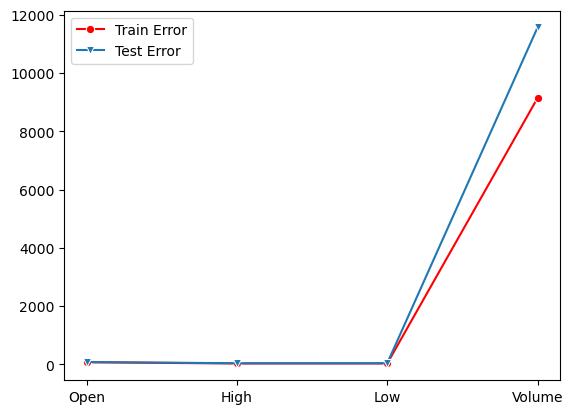

In [212]:
sns.lineplot(x=colList, y = train_error, marker='o', color='r', label='Train Error')
sns.lineplot(x=colList, y = test_error, marker='v', label='Test Error')


In [213]:
r2_df = pd.DataFrame(zip(colList,train_r2score, test_r2score), columns = ["Features","train_r2","test_r2"])
r2_df

,Features,train_r2,test_r2
0,Open,0.993730,0.993344
1,High,0.997166,0.996925
2,Low,0.997217,0.996741
3,Volume,0.196835,0.088258


<Axes: >

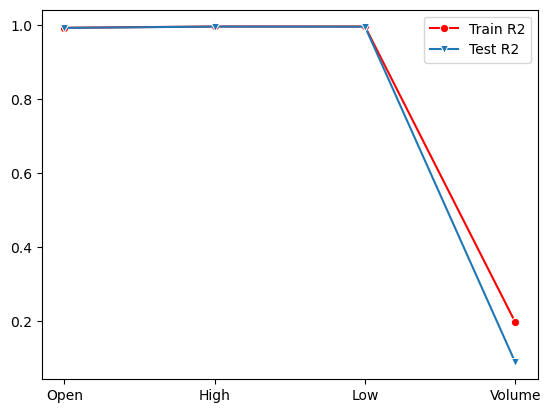

In [214]:
sns.lineplot(x=colList, y = train_r2score, marker='o', color='r', label='Train R2')
sns.lineplot(x=colList, y = test_r2score, marker='v', label='Test R2')


In [215]:
mae_df = pd.DataFrame(zip(colList,abs_train, abs_test), columns = ["Features","train_mae","test_mae"])
mae_df

,Features,train_mae,test_mae
0,Open,6.317449,6.529204
1,High,4.113193,4.485450
2,Low,4.092418,4.407517
3,Volume,81.123318,88.444595


<Axes: >

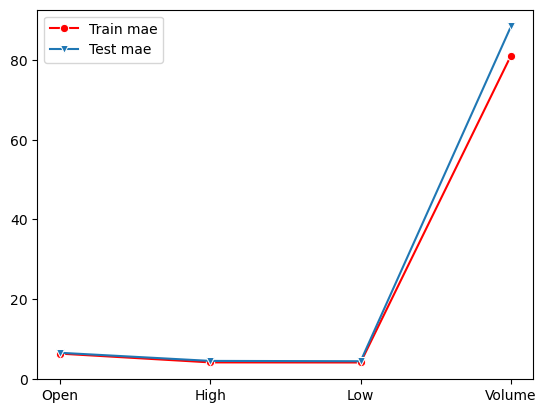

In [217]:
sns.lineplot(x=colList, y = abs_train, marker='o', color='r', label='Train mae')
sns.lineplot(x=colList, y = abs_test, marker='v', label='Test mae')


#### Fitting a model with only one column i.e., using feature High

In [119]:
LinearRegressor = LinearRegression()
train_x = X_train[:,1].reshape(-1,1)
test_x = X_test[:,1].reshape(-1,1)
LinearRegressor.fit(train_x, y_train)

LinearRegression()

In [120]:
y_pred = LinearRegressor.predict(X_test[:,1].reshape(-1,1))
y_pred[0:5]

array([361.48824577, 357.76834976, 269.36170831, 548.86760896,
       265.38457722])

#### Vizualize train set results

<Axes: ylabel='Close'>

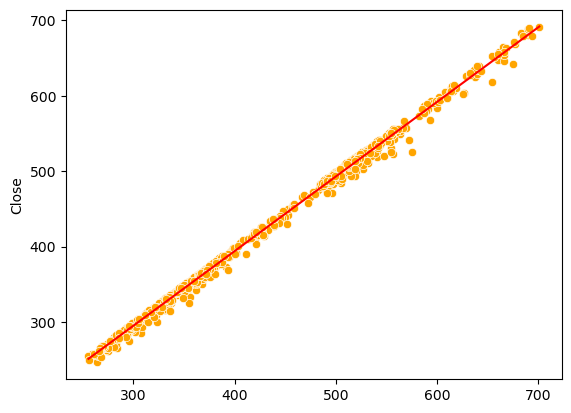

In [152]:
sns.scatterplot(
    x = sc.inverse_transform(
        X_train)[:,1],
        y = y_train,
    color = 'orange'
)
sns.lineplot(
    x = sc.inverse_transform(
        X_train)[:,1],
    y = LinearRegressor.predict(train_x),
    color = 'red'
)

#### Vizualize test set results

<Axes: ylabel='Close'>

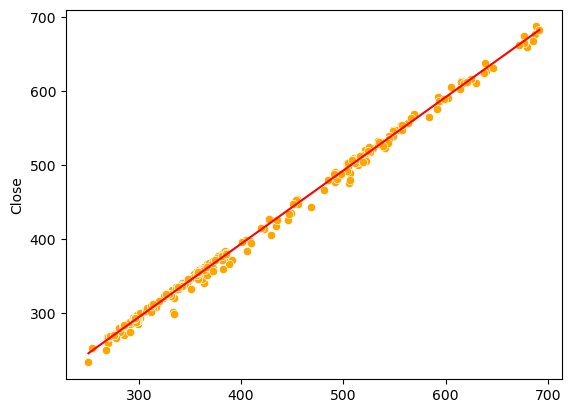

In [153]:
sns.scatterplot(
    x = sc.inverse_transform(
        X_test)[:,1],
        y = y_test,
    color = 'orange'
)
sns.lineplot(
    x = sc.inverse_transform(
        X_test)[:,1],
    y = LinearRegressor.predict(test_x),
    color = 'red'
)

#### 2. Multiple Linear Regression

Now we use all the existing features to build the model and check the train and test loss and r_squared value

In [218]:
MultipleRegressor = LinearRegression()
MultipleRegressor.fit(X_train,y_train)

LinearRegression()

In [219]:
MultipleRegressor.coef_

array([-61.00325074,  84.50526387,  83.24649151,   0.31850984])

In [220]:
MultipleRegressor.intercept_

420.21887505423285

In [221]:
y_pred = MultipleRegressor.predict(X_test)

In [222]:
mean_squared_error(y_train, MultipleRegressor.predict(X_train))

14.543984735254213

In [223]:
mean_squared_error(y_test, y_pred)

16.62026384511313

In [224]:
mean_absolute_error(y_test, y_pred)

3.0537774971199956

In [225]:
r2_score(y_train, MultipleRegressor.predict(X_train))

0.9987225029389595

In [226]:
r2_score(y_test, y_pred)

0.9986897244272149

#### 3. Artificial Neural Networks

In [60]:
# Initialize an ANN
# Sequential() allows to build sequential layers
ann = tf.keras.models.Sequential()
ann

In [61]:
# Adding input layer and first input layer
# dense class is used to create a fully connnected layer as a dense class object at any phase in an ann.
# add method is used to add any layer( hidden/ dropout/ conv2D) created using dense class
# When you create a first hidden layer, it automatically creates an input layer by assining
# # of neurons == # of input features. So in below, we mention # of neurons req for the first hidden layer
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

In [62]:
# Add second sequnetial layer
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

In [63]:
# Add output layer
# When doing multiclass classification, use softmax instead of sigmoid
ann.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

In [64]:
# Compiling an ANN
# in this step, we mention the optimizer, loss function and metrics required to evaluate our model

ann.compile(optimizer = 'adam', 
            loss = tf.keras.losses.MeanSquaredError(), 
            metrics = tf.keras.metrics.R2Score())

In [65]:
X_train

array([[ 0.60274087,  0.65476309,  0.64920688,  0.10003629],
       [ 1.84268394,  1.77661361,  1.81608365, -0.905156  ],
       [ 0.36228902,  0.37703955,  0.38187437, -0.63267406],
       ...,
       [-0.49874313, -0.50989311, -0.46998237,  0.0423014 ],
       [-1.11894897, -1.12068056, -1.08529103, -0.52962377],
       [-0.59829849, -0.62010965, -0.56441279, -0.5165558 ]])

In [66]:
# Training an ANN
ann.fit(X_train, y_train, batch_size = 16, epochs = 300)

Epoch 1/300
48/48 [==============================] - 0s 396us/step - loss: 188342.9375 - r2_score: -15.5434
Epoch 2/300
48/48 [==============================] - 0s 338us/step - loss: 187984.7812 - r2_score: -15.5120
Epoch 3/300
48/48 [==============================] - 0s 306us/step - loss: 187621.5625 - r2_score: -15.4800
Epoch 4/300
48/48 [==============================] - 0s 300us/step - loss: 187062.0469 - r2_score: -15.4310
Epoch 5/300
48/48 [==============================] - 0s 297us/step - loss: 186197.0625 - r2_score: -15.3549
Epoch 6/300
48/48 [==============================] - 0s 296us/step - loss: 184898.2188 - r2_score: -15.2411
Epoch 7/300
48/48 [==============================] - 0s 299us/step - loss: 183040.7344 - r2_score: -15.0777
Epoch 8/300
48/48 [==============================] - 0s 300us/step - loss: 180446.2656 - r2_score: -14.8498
Epoch 9/300
48/48 [==============================] - 0s 308us/step - loss: 176969.1562 - r2_score: -14.5444
Epoch 10/300
48/48 [========

In [77]:
input_obs = [401.970001, 427.700012, 398.200012, 427.140015]
ann.predict(sc.transform(np.array(list(input_obs)).reshape(1,-1)))

1/1 [==============================] - 0s 23ms/step


/Users/nithinkore/Documents/GitHub/NetflixSPPredE2E/NetflixStockPricePrediction/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[413.49548]], dtype=float32)

In [34]:
y_pred = ann.predict(X_test)
y_pred[:5]

8/8 [==============================] - 0s 2ms/step


array([[362.73404],
       [359.83057],
       [270.50107],
       [551.74915],
       [260.49872]], dtype=float32)

In [35]:
mean_squared_error(y_test, y_pred)

24.38261289564644

In [36]:
mean_squared_error(y_train, ann.predict(X_train))

24/24 [==============================] - 0s 351us/step


19.210989476226874

In [37]:
r2_score(y_test, y_pred)

0.9980777716662281

In [38]:
r2_score(y_train, ann.predict(X_train))

 1/24 [>.............................] - ETA: 0s

24/24 [==============================] - 0s 372us/step


0.9983125681824959

In [39]:
mean_absolute_error(y_test, y_pred)

3.681954926097766

##### Plotting a scatter for the predictions

<Axes: xlabel='Close'>

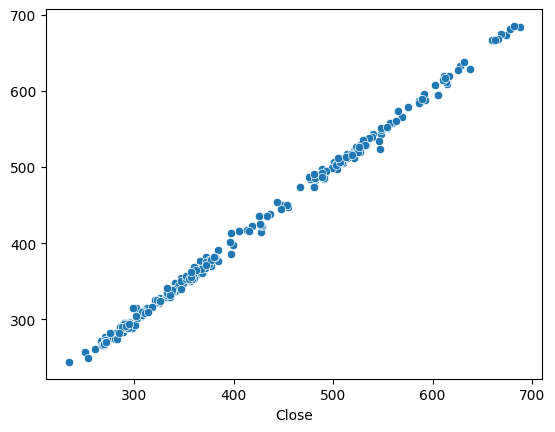

In [40]:
sns.scatterplot(x = y_test, y = y_pred.flatten())

This in a kind of evidence showing that the model is performing well for the given task. 

##### Plotting residuals

In [41]:
residuals = y_test - y_pred.flatten() 
residuals

284    3.495972
118    3.039429
432    0.768921
805    2.690856
221    0.081269
         ...   
955   -3.470092
59     3.234436
534   -8.295898
426    1.734406
404    0.501221
Name: Close, Length: 253, dtype: float64

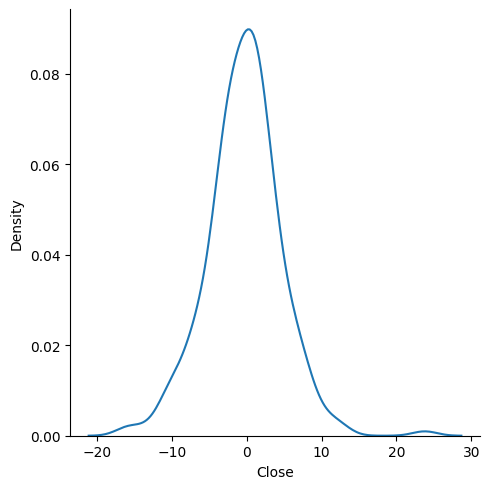

In [42]:
sns.displot(residuals, kind = 'kde')

#### pickle the model file for deployment

In [263]:
# pickle.dump(ann, open("ann_model.pkl", "wb"))

ann.save("ann_model.h5")

/Users/nithinkore/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [264]:
loaded_model = load_model('ann_model.h5')

In [265]:
loaded_model.predict(X_test)

8/8 [==============================] - 0s 705us/step


array([[363.418  ],
       [360.14584],
       [270.6936 ],
       [551.07166],
       [260.39267],
       [517.5325 ],
       [283.69772],
       [437.81143],
       [483.29977],
       [287.7408 ],
       [291.02396],
       [290.92648],
       [296.50046],
       [565.6561 ],
       [487.15335],
       [502.2814 ],
       [294.42456],
       [293.06583],
       [361.00568],
       [487.6017 ],
       [366.06326],
       [327.1844 ],
       [416.49316],
       [390.38535],
       [504.4413 ],
       [557.5775 ],
       [384.83142],
       [355.0668 ],
       [483.60748],
       [266.4    ],
       [340.10446],
       [587.827  ],
       [295.25748],
       [352.42627],
       [322.03348],
       [336.69446],
       [379.485  ],
       [357.93787],
       [288.79163],
       [355.24228],
       [483.45078],
       [558.5276 ],
       [286.65582],
       [521.32654],
       [319.8155 ],
       [508.54807],
       [619.135  ],
       [346.39615],
       [359.07504],
       [499.92587],
